Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


 Load dataset

In [3]:
dataset = pd.read_csv(r"D:\Develohub\Task#3\kc_house_data.csv")  
print("🔸 Dataset loaded successfully!")
print("📋 Columns:", dataset.columns)

🔸 Dataset loaded successfully!
📋 Columns: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


 Drop unnecessary columns

In [4]:
dataset = dataset.drop(['id', 'date'], axis=1)


Select features and target

In [5]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'zipcode']
target = 'price'

X = dataset[features]
y = dataset[target]



One-hot encode categorical column (zipcode)

In [6]:

X = pd.get_dummies(X, columns=['zipcode'], drop_first=True)

Scale numeric features

In [8]:
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split dataset

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train the model

In [10]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predict house prices

In [11]:

y_pred = model.predict(X_test)


Evaluate the model

In [13]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.2f}")

✅ Mean Absolute Error (MAE): 113721.64
✅ Root Mean Squared Error (RMSE): 201328.32


Visualize predictions

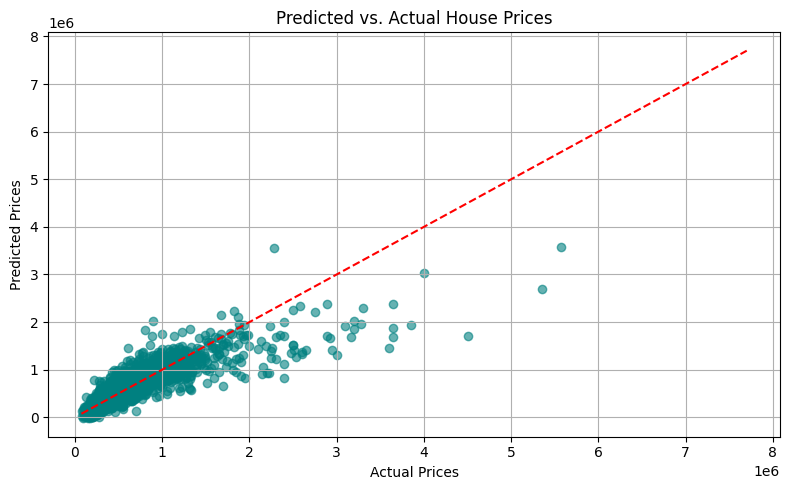

In [14]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()